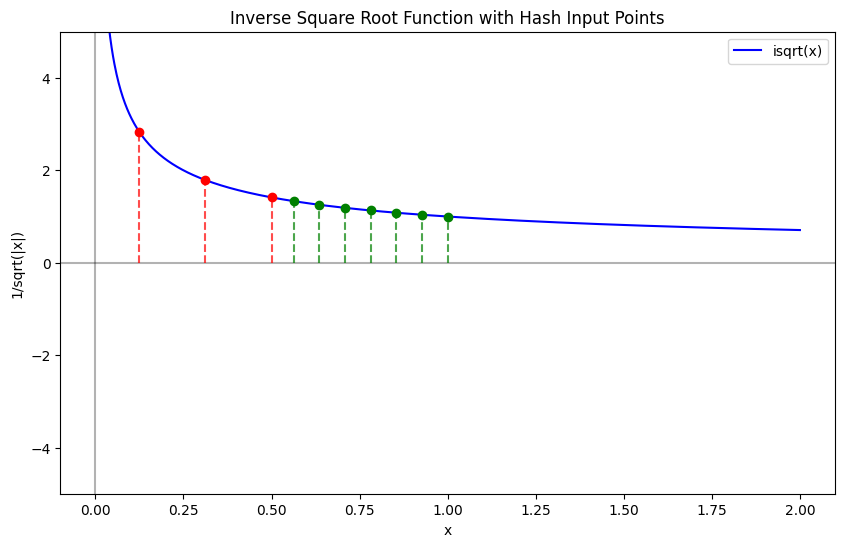

In [12]:
import torch
import matplotlib.pyplot as plt

# Create data points (avoiding 0 to prevent division by zero)
x = torch.linspace(0, 2, 1000)
x = x[x != 0]  # remove 0 to avoid division by zero

# Calculate inverse square root (1/sqrt(|x|))
y = torch.sign(x) / torch.sqrt(torch.abs(x))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), 'b-', label='isqrt(x)')
plt.grid(False)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot hash points for hash_bit = 3
hash_bit_3 = 3
hash_in_3 = torch.linspace(1/2**hash_bit_3, 0.5, 2**(hash_bit_3 - 1) - 1)
for point in hash_in_3:
    # Calculate the y value at this x point
    y_val = 1 / torch.sqrt(point)
    # Plot the point on the curve
    plt.plot(point.item(), y_val.item(), 'ro', markersize=6)
    # Draw a line from x-axis to the curve
    plt.plot([point.item(), point.item()], [0, y_val.item()], 'r--', alpha=0.7)

# Plot hash points for hash_bit = 4
hash_bit_4 = 4
hash_in_4 = torch.linspace(0.5 + 1/2**hash_bit_4, 1, 2**(hash_bit_4 - 1) - 1)
for point in hash_in_4:
    # Calculate the y value at this x point
    y_val = 1 / torch.sqrt(point)
    # Plot the point on the curve
    plt.plot(point.item(), y_val.item(), 'go', markersize=6)
    # Draw a line from x-axis to the curve
    plt.plot([point.item(), point.item()], [0, y_val.item()], 'g--', alpha=0.7)

# Add labels and title
plt.xlabel('x')
plt.ylabel('1/sqrt(|x|)')
plt.title('Inverse Square Root Function with Hash Input Points')
plt.legend(['isqrt(x)'])

# Set reasonable y-axis limits to better show the function behavior
plt.ylim(-5, 5)

# Show the plot
plt.show()

In [15]:
import pickle
with open("/home/cx922/mase/deit_tiny_layer_norm_search_results.pkl", "rb") as f:
    acc_list = pickle.load(f)

In [20]:
import pickle

0.792

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy_loss_vs_hash_bits(file_path, reference_value=0.7925):
    """
    Plot accuracy loss percentage vs hash bits on a logarithmic scale.
    
    Args:
        acc_list: List of tuples (hash_bit, accuracy_loss)
        reference_value: Reference accuracy value for calculating percentage loss
    """
    # Extract data from acc_list
    with open(file_path, "rb") as f:
        acc_list = pickle.load(f)
    hash_bits = [item[0] for item in acc_list]
    acc_losses = [item[1] for item in acc_list]
    
    # Calculate percentage of accuracy loss
    acc_loss_percentages = [(abs(loss/reference_value))*100 for loss in acc_losses]
    
    # Create the plot with log scale on y-axis
    plt.figure(figsize=(10, 6))
    plt.semilogy(hash_bits, acc_loss_percentages, 'bo-', linewidth=2, markersize=8)
    plt.grid(True, alpha=0.3)
    
    # Add labels and title
    plt.xlabel('Hash Bits')
    plt.ylabel('Accuracy Loss (%)')
    plt.title('Accuracy Loss vs Hash Bits (Log Scale)')
    
    # Add a horizontal line at y=100% for reference
    plt.axhline(y=100, color='k', linestyle='--', alpha=0.5)
    
    # Format y-axis to show percentage values directly (not log values)
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1, decimals=2))
    
    # Ensure y-ticks show actual percentage values
    yticks = plt.yticks()[0]
    plt.yticks(yticks, [f'{y:.2f}%' for y in yticks])
    
    plt.tight_layout()
    plt.show()

# Call the function with the loaded acc_list



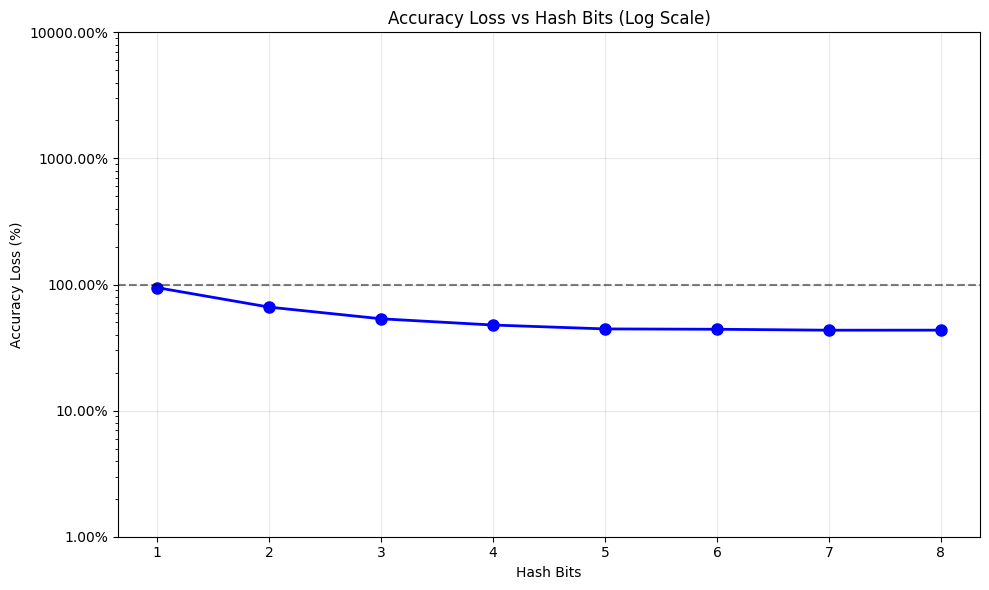

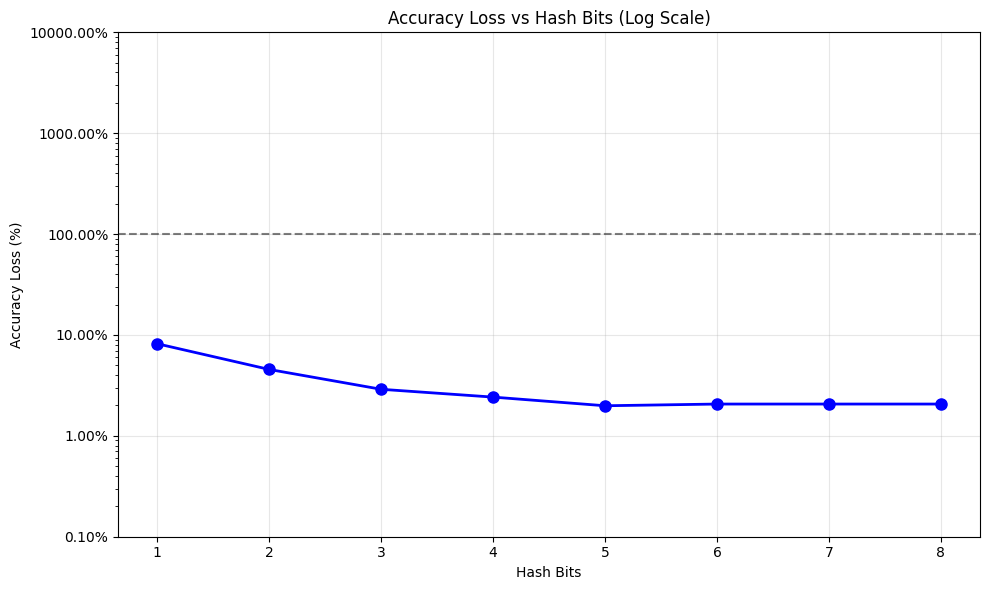

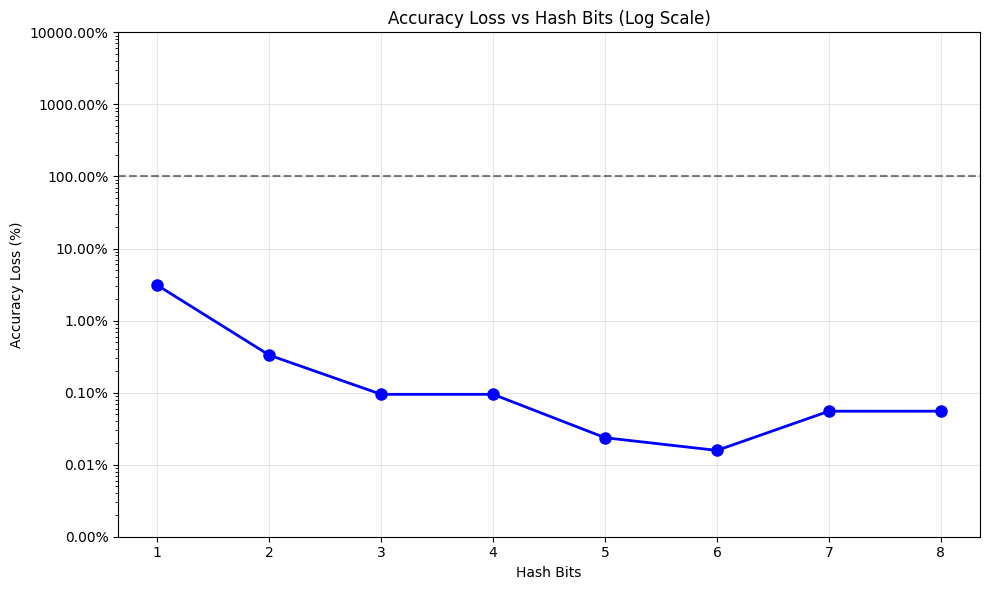

In [53]:
plot_accuracy_loss_vs_hash_bits("/home/cx922/mase/deit_tiny_gelu_search_results_int_1.pkl")
plot_accuracy_loss_vs_hash_bits("/home/cx922/mase/deit_tiny_gelu_search_results_int_2.pkl")
plot_accuracy_loss_vs_hash_bits("/home/cx922/mase/deit_tiny_gelu_search_results_int_3.pkl")

In [42]:
file_1 = "/home/cx922/mase/deit_tiny_gelu_search_results_int_1.pkl"
file_2 = "/home/cx922/mase/deit_tiny_gelu_search_results_int_2.pkl"
file_3 = "/home/cx922/mase/deit_tiny_gelu_search_results_int_3.pkl"

with open(file_1, "rb") as f:
    acc_list_1 = pickle.load(f)
with open(file_2, "rb") as f:
    acc_list_2 = pickle.load(f)
with open(file_3, "rb") as f:
    acc_list_3 = pickle.load(f)

# Extract data from each file and add the integer width to the hash bits
hash_bits_1 = [item[0] + 1 for item in acc_list_1]  # Add 1 for int width = 1
acc_losses_1 = [item[1] for item in acc_list_1]

hash_bits_2 = [item[0] + 2 for item in acc_list_2]  # Add 2 for int width = 2
acc_losses_2 = [item[1] for item in acc_list_2]

hash_bits_3 = [item[0] + 3 for item in acc_list_3]  # Add 3 for int width = 3
acc_losses_3 = [item[1] for item in acc_list_3]

reference_value = 0.792  # Using DEIT_TINY_IMAGENET_ACC_100ITER

# Calculate percentage of accuracy loss for each dataset
acc_loss_percentages_1 = [(abs(loss/reference_value))*100 for loss in acc_losses_1]
acc_loss_percentages_2 = [(abs(loss/reference_value))*100 for loss in acc_losses_2]
acc_loss_percentages_3 = [(abs(loss/reference_value))*100 for loss in acc_losses_3]

In [48]:
acc_loss_percentages_1

[94.4760101010101,
 66.22474747474747,
 53.519570707070706,
 47.75883838383839,
 44.48390151515152,
 44.20770202020202,
 43.45801767676768,
 43.497474747474755]

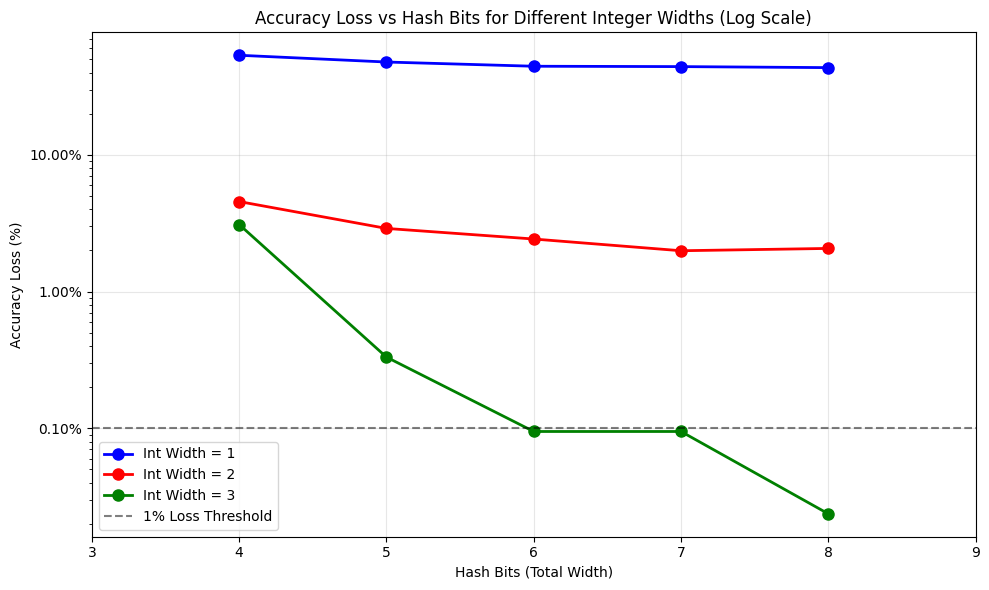

In [55]:
# Filter data to only include hash bits from 3 to 8
filtered_data_1 = [(bits, loss) for bits, loss in zip(hash_bits_1, acc_loss_percentages_1) if 4 <= bits <= 8]
filtered_data_2 = [(bits, loss) for bits, loss in zip(hash_bits_2, acc_loss_percentages_2) if 4 <= bits <= 8]
filtered_data_3 = [(bits, loss) for bits, loss in zip(hash_bits_3, acc_loss_percentages_3) if 4 <= bits <= 8]

# Unpack the filtered data
filtered_hash_bits_1, filtered_loss_1 = zip(*filtered_data_1) if filtered_data_1 else ([], [])
filtered_hash_bits_2, filtered_loss_2 = zip(*filtered_data_2) if filtered_data_2 else ([], [])
filtered_hash_bits_3, filtered_loss_3 = zip(*filtered_data_3) if filtered_data_3 else ([], [])

# Create the plot with log scale on y-axis
plt.figure(figsize=(10, 6))

# Plot all three datasets with filtered range
# Divide by 100 to convert percentage back to decimal for proper display
if filtered_data_1:
    plt.semilogy(filtered_hash_bits_1, [x/100 for x in filtered_loss_1], 'bo-', linewidth=2, markersize=8, label='Int Width = 1')
if filtered_data_2:
    plt.semilogy(filtered_hash_bits_2, [x/100 for x in filtered_loss_2], 'ro-', linewidth=2, markersize=8, label='Int Width = 2')
if filtered_data_3:
    plt.semilogy(filtered_hash_bits_3, [x/100 for x in filtered_loss_3], 'go-', linewidth=2, markersize=8, label='Int Width = 3')

plt.grid(True, alpha=0.3)

# Add labels and title
plt.xlabel('Hash Bits (Total Width)')
plt.ylabel('Accuracy Loss (%)')
plt.title('Accuracy Loss vs Hash Bits for Different Integer Widths (Log Scale)')

# Add a horizontal line at y=0.01 (1%) for reference
plt.axhline(y=0.001, color='k', linestyle='--', alpha=0.5, label='0.1% Loss Threshold')

# Set x-axis range explicitly
plt.xlim(3, 9)

# Add legend
plt.legend(loc='best')

# Format y-axis to show percentage values
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(xmax=1, decimals=2))

plt.tight_layout()
plt.show()


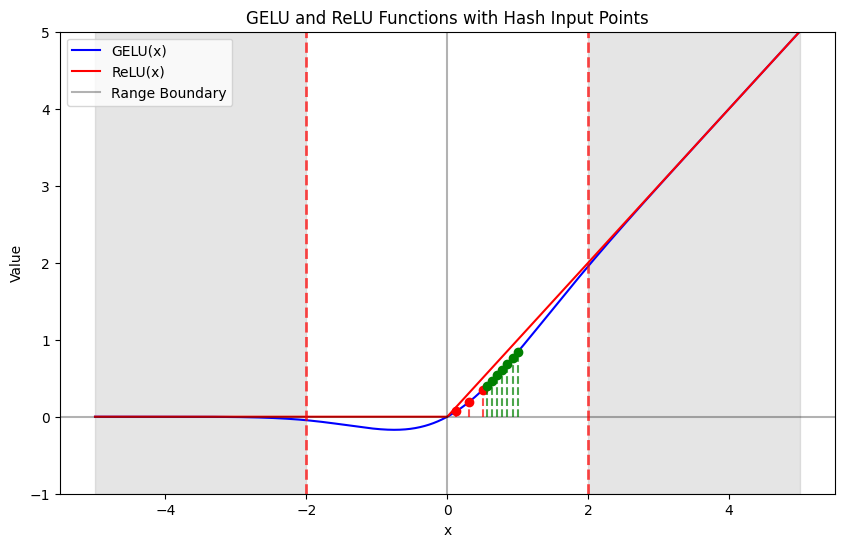

In [40]:
import torch
import matplotlib.pyplot as plt
import math

# Create data points (avoiding 0 to prevent division by zero)
x = torch.linspace(-5, 5, 1000)

# Calculate GELU function using torch.nn.functional.gelu
y_gelu = torch.nn.functional.gelu(x)
# Calculate ReLU function
y_relu = torch.nn.functional.relu(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y_gelu.numpy(), 'b-', label='GELU(x)')
plt.plot(x.numpy(), y_relu.numpy(), 'r-', label='ReLU(x)')
plt.grid(False)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Add vertical dashed lines at x=-2 and x=2
plt.axvline(x=-2, color='r', linestyle='--', linewidth=2, alpha=0.7)
plt.axvline(x=2, color='r', linestyle='--', linewidth=2, alpha=0.7)

# Add shaded regions outside of (-2, 2)
plt.axvspan(-5, -2, alpha=0.2, color='gray')
plt.axvspan(2, 5, alpha=0.2, color='gray')

# Plot hash points for hash_bit = 3
hash_bit_3 = 3
hash_in_3 = torch.linspace(1/2**hash_bit_3, 0.5, 2**(hash_bit_3 - 1) - 1)
for point in hash_in_3:
    # Calculate the y value using torch.nn.functional.gelu
    y_val = torch.nn.functional.gelu(point)
    # Plot the point on the curve
    plt.plot(point.item(), y_val.item(), 'ro', markersize=6)
    # Draw a line from x-axis to the curve
    plt.plot([point.item(), point.item()], [0, y_val.item()], 'r--', alpha=0.7)

# Plot hash points for hash_bit = 4
hash_bit_4 = 4
hash_in_4 = torch.linspace(0.5 + 1/2**hash_bit_4, 1, 2**(hash_bit_4 - 1) - 1)
for point in hash_in_4:
    # Calculate the y value using torch.nn.functional.gelu
    y_val = torch.nn.functional.gelu(point)
    # Plot the point on the curve
    plt.plot(point.item(), y_val.item(), 'go', markersize=6)
    # Draw a line from x-axis to the curve
    plt.plot([point.item(), point.item()], [0, y_val.item()], 'g--', alpha=0.7)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Value')
plt.title('GELU and ReLU Functions with Hash Input Points')
plt.legend(['GELU(x)', 'ReLU(x)', 'Range Boundary'])

# Set reasonable y-axis limits to better show the function behavior
plt.ylim(-1, 5)

# Show the plot
plt.show()

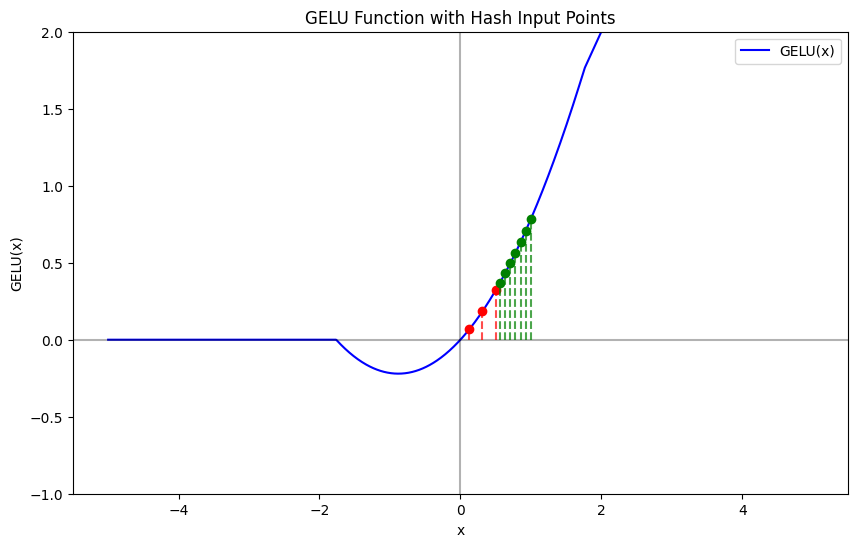

In [36]:
import torch
import matplotlib.pyplot as plt
import math

# Create data points (avoiding 0 to prevent division by zero)
x = torch.linspace(-5, 5, 1000)


def approx_gelu(x):
    return x * torch.nn.functional.relu6(1.702*x + 3)/6
# Calculate GELU function using torch.nn.functional.gelu
y = approx_gelu(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), y.numpy(), 'b-', label='GELU(x)')
plt.grid(False)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Plot hash points for hash_bit = 3
hash_bit_3 = 3
hash_in_3 = torch.linspace(1/2**hash_bit_3, 0.5, 2**(hash_bit_3 - 1) - 1)
for point in hash_in_3:
    # Calculate the y value using torch.nn.functional.gelu
    y_val = approx_gelu(point)
    # Plot the point on the curve
    plt.plot(point.item(), y_val.item(), 'ro', markersize=6)
    # Draw a line from x-axis to the curve
    plt.plot([point.item(), point.item()], [0, y_val.item()], 'r--', alpha=0.7)

# Plot hash points for hash_bit = 4
hash_bit_4 = 4
hash_in_4 = torch.linspace(0.5 + 1/2**hash_bit_4, 1, 2**(hash_bit_4 - 1) - 1)
for point in hash_in_4:
    # Calculate the y value using torch.nn.functional.gelu
    y_val = approx_gelu(point)
    # Plot the point on the curve
    plt.plot(point.item(), y_val.item(), 'go', markersize=6)
    # Draw a line from x-axis to the curve
    plt.plot([point.item(), point.item()], [0, y_val.item()], 'g--', alpha=0.7)

# Add labels and title
plt.xlabel('x')
plt.ylabel('GELU(x)')
plt.title('GELU Function with Hash Input Points')
plt.legend(['GELU(x)'])

# Set reasonable y-axis limits to better show the function behavior
plt.ylim(-1, 2)

# Show the plot
plt.show()

In [13]:
from utils import acc_cal

from transformers import ViTForImageClassification
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224", attn_implementation="sdpa", torch_dtype=torch.float16)

In [14]:

test_dataloader = data_module.test_dataloader()
acc_after = acc_cal(model, test_dataloader)

  0%|          | 0/1563 [00:00<?, ?it/s]

  0%|          | 0/1563 [00:02<?, ?it/s]


AttributeError: 'ImageClassifierOutput' object has no attribute 'argmax'